<a href="https://colab.research.google.com/github/JanMatthias1/Big_data_analysis_endterm/blob/main/HS22_BigData_Final_Project_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Instructions

**PLEASE DO NOT SHARE THE DATASETS and NOTEBOOK with other people!!!!**

You have the option to analyze one of two datasets for the endterm and: 

*   Predict diabetes (current status or future onset) from clinical imaging data or molecular parameters; or
*   Predict COVID death or intensive care unit (ICU) admission from lifestyle and clinical parameters.



## Required final project components
### Part 1
Describe the population with regards to the outcome you chose (e.g. comparison of age distribution for patients who died vs patients who didn't die, comparison of gender vs diabetes status, comparison ) with at least three plots, which are accurately labeled and interpreted. In this part, also consider pre-processing and describing your data with regards to the missing data.

### Part 2
#### For the COVID analysis
The first COVID cases were discovered in Mexico on February 28th 2020. Using pd.to_datetime to convert the date of death into a datetime object, then using the deltatime object of time elapsed from the first COVID cases (pd.to_datetime('28.02.2020')) until death as the time to event, plot a Kaplan-Meier curve for the people who have died of COVID, subgrouped by any variable of your choosing (e.g. males vs females, younger/older than 65, with/without pneumonia, smokers yes/no).

#### For the Diabetes analysis
Use any clustering algorithm of your chosing to cluster the individuals in the dataset based on either clinical imaging or metabolomics data. 
Then choose the visualization method that you prefer to visualize the different clusters (variable 1 vs variable 2, diabetes vs age, PC1 vs PC2, tSNE, etc). 

### Part 3
* Predict your outcome of interest according to 2 distinct machine learning methods that we have learnt.

* For each prediction, show confusion plot of the train and test dataset and indicate:
  1.  accuracy;
  2.  precision;
  3.  recall.

* Interpret the results from each ML method, and comment how the predictions could be improved.


**Examples**

*Use Random Forest classifier and K-NN classifier to predict whether a patient will die of COVID.*

or

*Use Gradient Boosting classifier and logistic regression to predict with clinical imaging data (and patients info) whether someone currently has diabetes.*


## Extra points (ordered from most to least rewarded) 

You can get extra points (in addition to the max points of the endterm) if you:

* Run the analysis on Euler using the entire dataset (for that option you would also to upload your code as a .py file, the command used to run the script on Euler and the output of your code, i.e. the slurm file and any figure/table saved as part of your analysis).
* Fine tune the methods parameters using GridSearchCV;
* Show which covariate(s) contributes the most to the prediction (from one method is sufficient);
* Plot the covariate(s) that contributes the most to the prediction as a function of the outcome.



## Analysis notes

* Remember to drop NAs if necessary and standardize the data where relevant. 

* Some covariates might strongly correlate with each other. If so, show a representative plot and drop the rendundant ones.

* This are a real-world datasets. It is normal that the predictions won't have very high accuracy/precision/recall.

* Provide visualisation and interpretation of your results.




## Submission method

Same as for the midterm. Please do not copy/paste from each other.




## Deadline

The deadline is in approximately one month and 10 days from now, on January 15th. If you need more time, let us know.



# Dataset 1: COVID outcomes
For this final project, you will work with real-world COVID patients data. 

You can decide on the outcome that you want to study:
* whether a patient died;
* whether a patient was admitted to the intensive care unit (ICU)

You can decide on the dataset you want to use:
* the reduced version (n = 100'000)
* the entire dataset (n = 1'048'576) --> Euler becomes essential






## Dataset

You can choose to use the subset we provide or the entire dataset that you can access from [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset).

In [ ]:
import pandas as pd
import numpy as np

url='https://drive.google.com/file/d/1Al7CF0jLX279YbBhhJfnFdA3rQ8Q7U8v/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
covid = pd.read_csv(url)

## Dataset dictionary



The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1'048'576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". Values encoded as 97 and 99 are missing data.

* sex: female or male.
* age: of the patient.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization..
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* death: indicates whether the patient died or recovered.

Note: you can ignore the column "CLASIFFICATION_FINAL"

Source: [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime', 'time', 'legend']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Graphical analysis + data filtering

In [ ]:
len(covid)

100000

In [ ]:
covid.drop_duplicates(inplace=True)
covid.dropna(inplace=True)

In [ ]:
covid.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

For this part if the date died had 9999-99-99 the patient was assumed to be alive. For the grphical analysis the data filtering was as conservative as possible, in order to have the most data possible. Before each graph, when needed, the data was checked and, when needed, filtered/edited. 
For the machine learning part a more "agressive" data filtering was used, this can be seen in the machine learning chapter.

In [ ]:
date_check=covid["DATE_DIED"].value_counts().sort_index()
date_check

01/02/2020        4
01/02/2021        1
01/03/2020        7
01/04/2020       31
01/04/2021        1
              ...  
31/03/2020       44
31/05/2020      438
31/07/2020       69
31/08/2020        4
9999-99-99    18030
Name: DATE_DIED, Length: 337, dtype: int64

In [ ]:
covid_died1 = covid[covid.DATE_DIED.str.contains("9999-99-99") == False]
covid_alive=covid[covid.DATE_DIED.str.contains("9999-99-99") == True]
covid_alive["died"]="alive" #0 means ALIVE
covid_died1["died"]="dead"  #1 means DEAD
# divided the data sets based on dead or not, later gave 1 and 2

<ipython-input-83-43ea942990b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_alive["died"]="alive" #0 means ALIVE
<ipython-input-83-43ea942990b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_died1["died"]="dead"  #1 means DEAD


In [ ]:
df= pd.merge(covid_died1, covid_alive, how="outer")
len(df)

58844

In [ ]:
df["died"].value_counts(normalize=True)

dead     0.693597
alive    0.306403
Name: died, dtype: float64

In [ ]:
df= df.dropna(subset=['AGE'])

Here for the age I didn't remove the 99 as we don't know if the patient is acutally 99 or the datas are missing

In [ ]:
dict1=["Under 50", "between 50 and 59", "between 60 and 69", "between 70 and 79","between 80 and 89", "Over 90 "]
dict2= [df[df['AGE']< 50],
        df[(df['AGE']>= 50.0) & (df['AGE']<60.0)],
        df[(df['AGE']>= 60.0) & (df['AGE']<70.0)],
        df[(df['AGE']>= 70.0) & (df['AGE']<80.0)],
        df[(df['AGE']>= 80.0) & (df['AGE']<90.0)],
        df[df['AGE']>=90]]

value_alive=[]
value_dead=[]

for i in range(6):
  a=(dict2[i]['died'].value_counts(normalize=True).sort_index(ascending=False)["alive"]) 
  value_alive = np.append(value_alive, a)
  b=(dict2[i]['died'].value_counts(normalize=True).sort_index(ascending=False)["dead"]) 
  value_dead = np.append(value_dead, b)        

In [ ]:
for i in range(6):
  print(dict2[i]['died'].value_counts(normalize=True).sort_index(ascending=False))

dead     0.448119
alive    0.551881
Name: died, dtype: float64
dead     0.702023
alive    0.297977
Name: died, dtype: float64
dead     0.806625
alive    0.193375
Name: died, dtype: float64
dead     0.859127
alive    0.140873
Name: died, dtype: float64
dead     0.884239
alive    0.115761
Name: died, dtype: float64
dead     0.870474
alive    0.129526
Name: died, dtype: float64


In [ ]:
for i in range(6):
  print(dict2[i]['died'].value_counts(normalize=True).sort_index(ascending=False).values[0]) # with values, it takes the second one, !position!

0.4481191763487864
0.7020225776105362
0.8066253504500517
0.8591265848259207
0.8842386464826358
0.8704735376044568


In [ ]:
value_dead

array([0.44811918, 0.70202258, 0.80662535, 0.85912658, 0.88423865,
       0.87047354])

In [ ]:
value_alive

array([0.55188082, 0.29797742, 0.19337465, 0.14087342, 0.11576135,
       0.12952646])

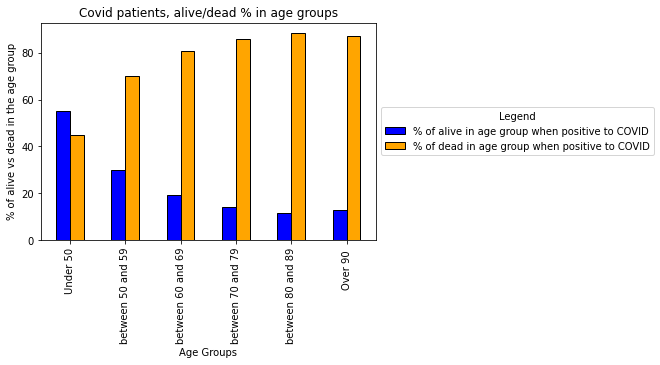

In [ ]:
# want to compare patients who died to patients who didn't die 
n=6
r = np.arange(6)
width = 0.25  

plt.bar(r, value_alive*100, color = ['blue'], width = width, edgecolor = 'black', label='% of alive in age group when positive to COVID')
plt.bar(r + width, value_dead*100, color = ['orange'],width = width, edgecolor = 'black',label='% of dead in age group when positive to COVID')

plt.xticks(r + width/2,["Under 50", "between 50 and 59", "between 60 and 69", "between 70 and 79","between 80 and 89", "Over 90 "])
plt.xlabel('Age Groups')
plt.xticks(rotation=90) 
plt.ylabel('% of alive vs dead in the age group')
plt.title('Covid patients, alive/dead % in age groups') 
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), title= "Legend")  

With increasing age the percentage of people who die from covid increase. (not done with statistical analysis but by observing the graph)

In [ ]:
df["DIABETES"].value_counts()

2     38450
1     20243
98      151
Name: DIABETES, dtype: int64

Here we have the 98 value, however we are looking if the person is affected by the disease, =1 no need to remove the 98 or 99 for other diseases. In order to not esclude patients just becase one column doesn't contain information (99 or 98) I decided to leave this data in. In the Machine learning part I filtered the data again to not have any missing data. 

In [ ]:
# pneumonia patients vs non pneumonia patients outcome 2 --> means not obese 
# 1 means has pneumonia (YES), 2 means (NO)
# taking patients with diesease and seeing outcome, dead or alive--> making graph to compare the different conditions 
disease=("HIPERTENSION","PNEUMONIA","DIABETES","CARDIOVASCULAR", "TOBACCO","OBESITY", "RENAL_CHRONIC")

for i in range(len(disease)):
  df= df.dropna(subset=[disease[i]])

alive_disease=[]
dead_disease=[]

for i in range(len(disease)):
  a=df[df[disease[i]]==1]['died'].value_counts().sort_index(ascending=False)["dead"]
  dead_disease = np.append(dead_disease, a)
  b=df[df[disease[i]]==1]["died"].value_counts().sort_index(ascending = False)["alive"] 
  alive_disease = np.append(alive_disease, b)  

In [ ]:
df[df["DIABETES"]==1]['died'].value_counts().sort_index(ascending=False)

dead     15149
alive     5094
Name: died, dtype: int64

In [ ]:
df[df["DIABETES"]==1]['died'].value_counts().sort_index(ascending=False)["alive"]  # to check if the results are correct

5094

In [ ]:
alive_disease 

array([6265., 5564., 5094., 1010., 2563., 5275.,  995.])

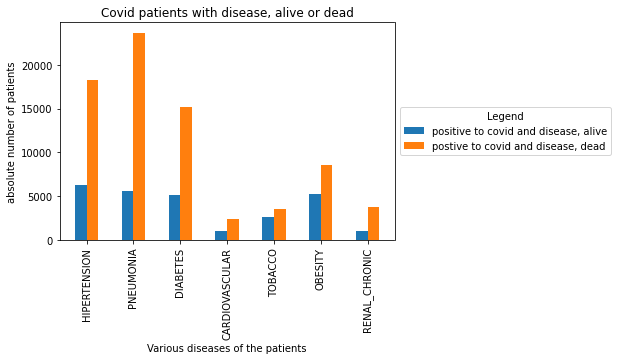

In [ ]:
n=(len(disease))
r = np.arange(len(disease))
width = 0.25

plt.bar(r,alive_disease, width=width,label='positive to covid and disease, alive') 
plt.bar(r+width,dead_disease, width=width,label='postive to covid and disease, dead')

plt.xticks(r + width/2,disease)
plt.ylabel("absolute number of patients")
plt.xlabel('Various diseases of the patients')
plt.title("Covid patients with disease, alive or dead")
plt.legend()
plt.xticks(rotation=90) 
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), title= "Legend") 

With this graph, I wanted to see the effect of a disease on patient death. In the graph all patients have the disease on the x axis and are positive to covid. Additionally one can see if the patient with the disease and positive to covid, is dead or alive. 
For example when one is diagnosed with Pneumonia, the "chances" of dying are much higher, as most patients die. Obestity instead doesn't seem to be so influencial.
These observations are done by observing the graph, not by statistical analysis 

In [ ]:
covid_died1["SEX"].value_counts()

2    25647
1    15167
Name: SEX, dtype: int64

Here we only have female and male, no need to pre-process or eliminate missing data. Subsequently in the graphs we are only looking at data when the disease is present (=1). 

In [ ]:
covid_died1[covid_died1["RENAL_CHRONIC"]==1]["SEX"].value_counts().sort_index(ascending = False)

2    2136
1    1584
Name: SEX, dtype: int64

In [ ]:
#gender, died with disease, how is the distribution with gender 
# 1 means has pneumonia (YES), 2 means (NO)
covid_died1 #data set with people who died, sex female 1, male 2
disease=("HIPERTENSION","PNEUMONIA","DIABETES","CARDIOVASCULAR", "TOBACCO","OBESITY", "RENAL_CHRONIC")
male=[]
female=[]
#1 - female  2 - male
for i in range(len(disease)):
  a=covid_died1[covid_died1[disease[i]]==1]["SEX"].value_counts().sort_index(ascending = False)[2] #2 is male
  male = np.append(male, a)
  b=covid_died1[covid_died1[disease[i]]==1]["SEX"].value_counts().sort_index(ascending = False)[1] # 1 is female 
  female = np.append(female, b)   

In [ ]:
male

array([10433., 14865.,  8633.,  1481.,  2876.,  4828.,  2136.])

In [ ]:
female

array([7794., 8800., 6516.,  938.,  641., 3723., 1584.])

In [ ]:
covid_died1[covid_died1["RENAL_CHRONIC"]==1]["SEX"].value_counts().sort_index(ascending = False) # 1 is female , 2 is male

2    2136
1    1584
Name: SEX, dtype: int64

In [ ]:
covid_died1[covid_died1["RENAL_CHRONIC"]==1]["SEX"].value_counts().sort_index(ascending = False)[1] # gives you the value of the one 

1584

In [ ]:
covid_died1[covid_died1["RENAL_CHRONIC"]==1]["SEX"].value_counts().sort_index(ascending = False).values[1] #position 0, then 1 (second)

1584

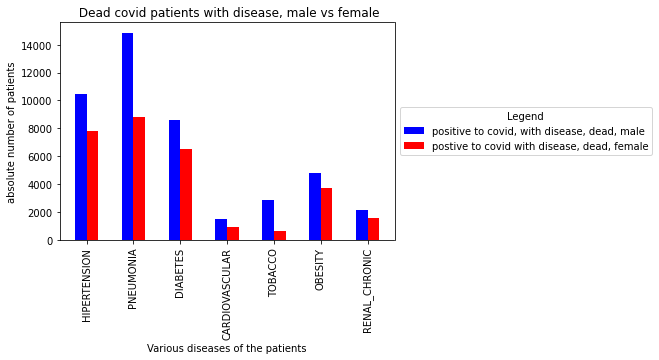

In [ ]:
n=(len(disease))
r = np.arange(len(disease))
width = 0.25

plt.bar(r,male, width=width,label='positive to covid, with disease, dead, male', color="blue") 
plt.bar(r+width,female, width=width,label='postive to covid with disease, dead, female', color="red")

plt.xticks(r + width/2,disease)
plt.ylabel("absolute number of patients")
plt.xlabel('Various diseases of the patients')
plt.title(" Dead covid patients with disease, male vs female")
plt.legend()
plt.xticks(rotation=90) 
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), title= "Legend") 

In [ ]:
print("covid died data set")
print(covid_died1["SEX"].value_counts(normalize=True))

covid died data set
2    0.628387
1    0.371613
Name: SEX, dtype: float64


In [ ]:
print("covid data set")
print(df["SEX"].value_counts(normalize=True))

covid data set
2    0.591836
1    0.408164
Name: SEX, dtype: float64


In this graph I looked at all of the dead patients with the disease, and differentiated them by sex. In all of the diseases, the death rate is higher in the male group. It should be noted that in the initial data set, with alive and dead patients, there are 62% males and 38% females. This could be due to bad sampling in the smaller data set, or males have a higher chance of becoming infected by covid thus having a higher percentage in the within the data sets.

# Kepler Meier Diagram

In [ ]:
covid_died = covid[covid.DATE_DIED.str.contains("9999-99-99") == False]

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()  

In [ ]:
pd.to_datetime(covid_died["DATE_DIED"])
day1=pd.to_datetime('28.02.2020')
covid_died["time_elapsed"]=pd.to_datetime(covid_died["DATE_DIED"])-day1
covid_died["died"]=1

<ipython-input-113-67f22d8e65dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_died["time_elapsed"]=pd.to_datetime(covid_died["DATE_DIED"])-day1
<ipython-input-113-67f22d8e65dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_died["died"]=1


In [ ]:
covid_died["time_elapsed"].min()

Timedelta('-57 days +00:00:00')

In [ ]:
covid_died["DATE_DIED"].min()
covid_died.drop(covid_died[covid_died['time_elapsed'] < "0 days"].index, inplace = True)
# there a few dates that slipped in that are before the 28 of feb.--> give a negative result 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
covid_died["time_elapsed"].min()

Timedelta('0 days 00:00:00')

In [ ]:
covid_died['time_elapsed_int'] = covid_died['time_elapsed'].dt.days.astype('int16')

<ipython-input-117-97921a4dfad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_died['time_elapsed_int'] = covid_died['time_elapsed'].dt.days.astype('int16')


First on how the death rate evolved over time, comparing died (in this data set all the patients died), with time elapsed 

Text(0.5, 1.0, 'Kepler Meier graph of patients who died of Covid')

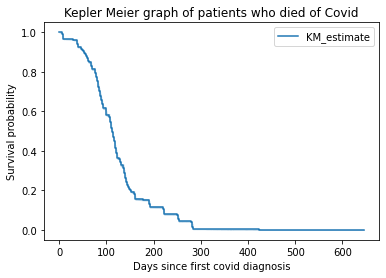

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(covid_died['time_elapsed_int'],covid_died['died'])
kmf.plot_survival_function()
plt.ylabel('Survival probability')
plt.xlabel('Days since first covid diagnosis')
plt.title("Kepler Meier graph of patients who died of Covid")

In [ ]:
covid_died.drop(covid_died[covid_died['PNEUMONIA'] == 99].index, inplace = True)   

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Checked if penumonia needed any filtering, only have 1/2 no filtering needed

In [ ]:
covid_died['PNEUMONIA'].value_counts()

1    22157
2    15741
Name: PNEUMONIA, dtype: int64

1
2


Text(0.5, 0, 'Days since first covid diagnosis')

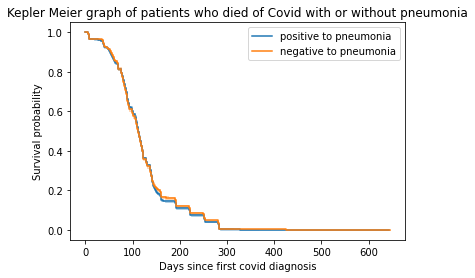

In [ ]:
kmf = {}
legend=["","positive to pneumonia", "negative to pneumonia"]
#1 means "yes" and 2 means "no"
for i in covid_died['PNEUMONIA'].unique():
  print(i)
  kmf[i] = KaplanMeierFitter()
  df1 = covid_died[covid_died['PNEUMONIA'] == i]
  kmf[i].fit(df1['time_elapsed_int'], event_observed=df1['died'])
  kmf[i].plot_survival_function(label = legend[i])

plt.ylabel('Survival probability')  
plt.title("Kepler Meier graph of patients who died of Covid with or without pneumonia")
plt.xlabel('Days since first covid diagnosis')

In this data set all the people have died, and the difference between people with or without on death outcome is minimal. This is also seen later in the modelling part, where pneumonia does play a role but is not very important.

In [ ]:
covid_died["time_elapsed_int"].max()

645

# ML

Predict your outcome of interest according to 2 distinct machine learning methods that we have learnt.
For each prediction, show confusion plot of the train and test dataset and indicate:
accuracy;
precision;
recall.
Interpret the results from each ML method, and comment how the predictions could be improved.
Examples
Use Random Forest classifier and K-NN classifier to predict whether a patient will die of COVID.


Random Forest classifier:

1.   Initial ML
2.   Optimisation with searchCV 



Here the data was processed for the machine learning part.

In [ ]:
covid_alive["died"]=0 #0 means ALIVE
covid_died1["died"]=1  #1 means DEAD
# divided the data sets based on dead or not
df1= pd.merge(covid_died1, covid_alive, how="outer")

<ipython-input-123-ecba0c26330d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_alive["died"]=0 #0 means ALIVE
<ipython-input-123-ecba0c26330d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_died1["died"]=1  #1 means DEAD


Used the data set, without the time elapsed or date died. Want to look at only the diseases intially. 



In this version of the code, all the other parameters were used (can be seen in the variable features)

In [ ]:
df1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58839,2,4,2,2,9999-99-99,1,2,43,97,2,...,2,2,2,2,2,2,2,3,1,0
58840,2,4,1,1,9999-99-99,97,1,32,2,2,...,2,2,2,2,1,2,2,3,97,0
58841,2,4,2,1,9999-99-99,97,2,42,97,2,...,1,2,1,2,2,2,2,3,97,0
58842,1,4,2,2,9999-99-99,2,2,39,97,2,...,2,2,2,2,1,2,1,3,2,0


In [ ]:
df1["PATIENT_TYPE"].value_counts()

2    45308
1    13536
Name: PATIENT_TYPE, dtype: int64

In [ ]:
df1[df1["SEX"]==1]["PREGNANT"].value_counts()
# 1 is female, there are 98 non values--> delete 

2     23685
1       291
98       42
Name: PREGNANT, dtype: int64

In [ ]:
df1.drop(df1[(df1["SEX"]==1) & (df1["PREGNANT"]==98)].index, inplace = True)
# Dropping all of the females with 98, as we don't know if they are pregnant or not 
# 1 means "yes" and 2 means "no"

In [ ]:
df1[df1["SEX"]==2]["PREGNANT"].value_counts()
# these are all males, can change the value to 2, not pregnant

97    34826
Name: PREGNANT, dtype: int64

In [ ]:
# changing the values for all males to 2, not pregnant 
df1['PREGNANT'] = df['PREGNANT'].replace([97], [2])

In [ ]:
df1["ICU"].value_counts()

2     42637
97    13510
1      1692
99      963
Name: ICU, dtype: int64

In [ ]:
features_filter = list(df1.columns)
print("len of all features", len(features_filter))
features_filter.remove("AGE")
features_filter.remove("DATE_DIED")
features_filter.remove("CLASIFFICATION_FINAL")

len of all features 22


In [ ]:
for i in range(len(features_filter)):
  df1.drop(df1[df1[features_filter[i]] == 97].index, inplace = True)
  df1.drop(df1[df1[features_filter[i]] == 99].index, inplace = True)
  df1.drop(df1[df1[features_filter[i]] == 98].index, inplace = True)

In [ ]:
features_filter = list(df1.columns)
features_filter.remove("DATE_DIED")
features_filter.remove("CLASIFFICATION_FINAL")
len(features_filter)

20

In [ ]:
'''
Initial features that were analysed, in this analysis all the features beside date died and classification were analysed
features = df1[["MEDICAL_UNIT","SEX","AGE","PATIENT_TYPE","INTUBED","PNEUMONIA","DIABETES","CARDIOVASCULAR", "TOBACCO","OBESITY", "RENAL_CHRONIC"]]
values that we want to see how the correlation is 
features = np.array(features)
'''
features= df1[features_filter] #date died and classification final are already removed 
features= df1[[i for i in features if "died" not in i]]# need to remove died as this is what we are trying to predict
labels = df1['died']# value that we want to predict 

Check if there is a high correlation with the variables

Text(0.5, 1.0, 'Correlation Matrix')

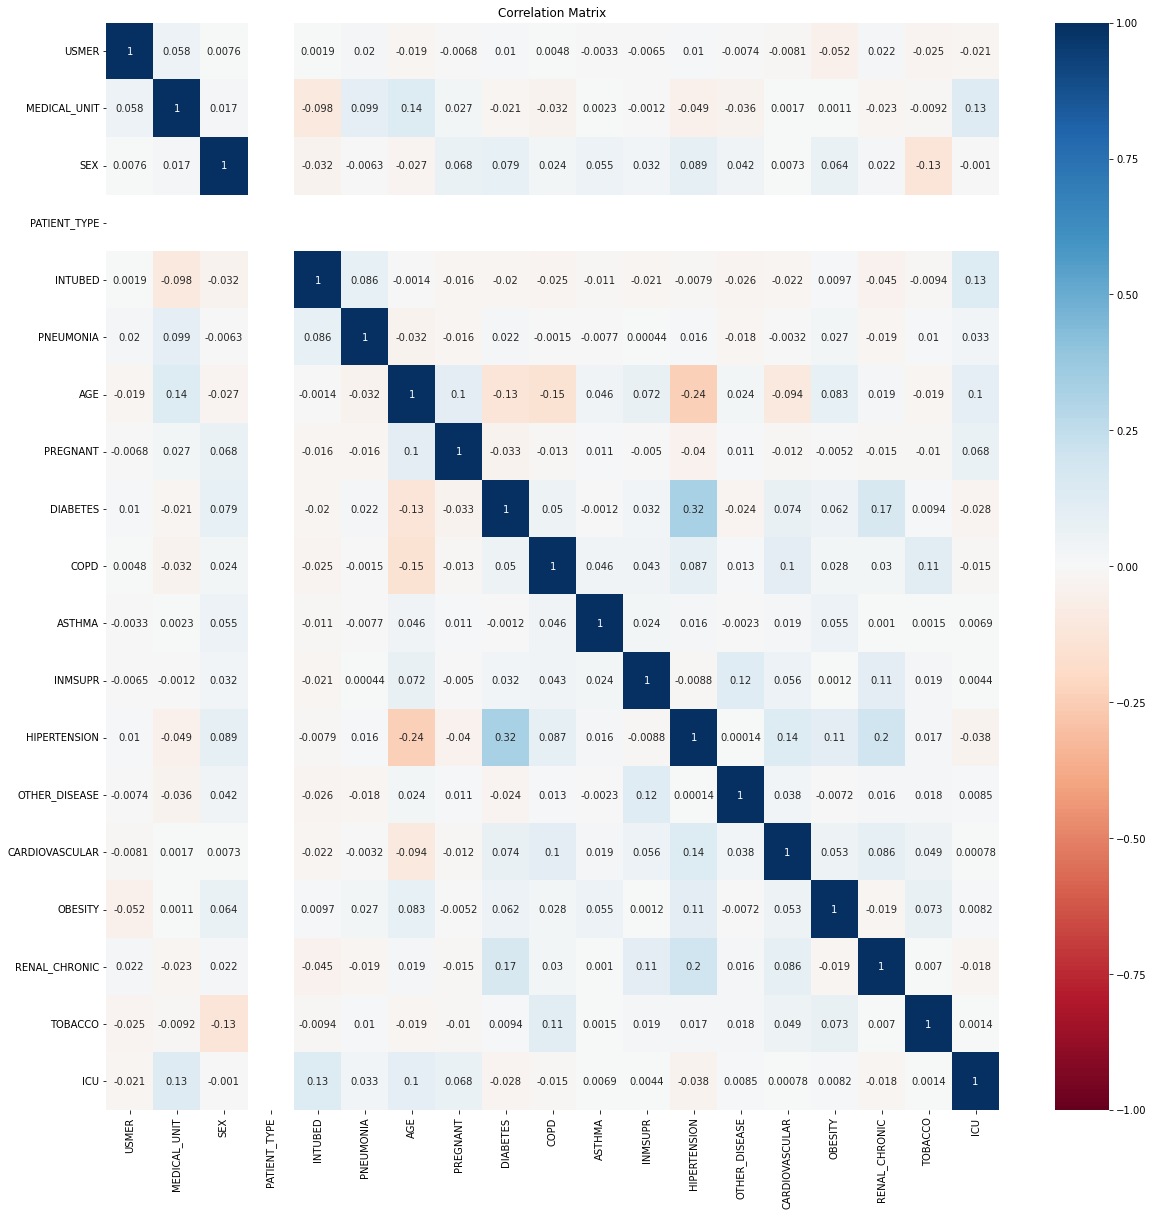

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(features.corr(),annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

In [ ]:
df1["PATIENT_TYPE"].value_counts()

2    44143
Name: PATIENT_TYPE, dtype: int64

As patient type now only has 2, it could be removed from features, but i left it in in case that in the euler data set something changes. In the feature importance for this model, as expected the result is 0.

In [ ]:
from sklearn.model_selection import train_test_split
# splitting data set into training and testing
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42, stratify = labels)
# died, date died and classification final are removed from the feature data sets (22-3)=19

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (33107, 19)
Training Labels Shape: (33107,)
Testing Features Shape: (11036, 19)
Testing Labels Shape: (11036,)


For the first model I choose a Random Forest Classifier 

In [ ]:
# Here the model was fitted with the TRAIN data set 
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
prediction_model =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini", random_state=2021).fit(train_features,train_labels)
print ("score %.2f"%prediction_model.score(train_features.values, train_labels))
# run the train model and see the score

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


score 0.84


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


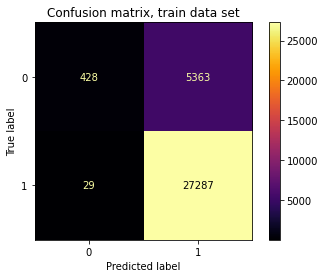

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# see the confusion matrix for the model on TRAIN data set
plot_confusion_matrix(prediction_model,train_features, train_labels, cmap='inferno',values_format='g')
plt.title("Confusion matrix, train data set")
plt.show()

In [ ]:
# calculate the predicted survival rate, with the TRAIN features 
predicted_survival_train = prediction_model.predict(train_features)

#function to print results with TRAIN set and prediction variable
from sklearn import metrics
def getresults(test,pred_variable):
    return 'Precision:', metrics.precision_score(test,pred_variable), 'Recall: ', metrics.recall_score(test,pred_variable),"Accuracy:", metrics.accuracy_score(test,pred_variable), "F1:", metrics.f1_score(test,pred_variable)
print("Outcomes with RandomForestClassifier model with train set")
print(getresults(train_labels,predicted_survival_train)) #need to have the labels here 

Outcomes with RandomForestClassifier model with train set
('Precision:', 0.8357427258805513, 'Recall: ', 0.9989383511495095, 'Accuracy:', 0.8371341408161416, 'F1:', 0.910082380015342)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


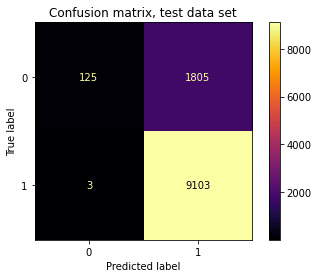

In [ ]:
#see the matrix with the TEST features 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(prediction_model,test_features, test_labels, cmap='inferno',values_format='g')
plt.title("Confusion matrix, test data set")
plt.show()
# train_prediction is the model in question, here done with the testing data set

0 means ALIVE, 1 is dead. As seen in the confusion matrix the model has difficult predicting alive people. One reason for this could be that multiple features are important, as seen in the feature importance graph, therefore it "thinks" they are dead when they have that feature 

In [ ]:
# calculate the predicted survival, with the TEST features (divided above)
predicted_survival = prediction_model.predict(test_features)
#function to print results with test set and prediction variable
print("Outcomes with RandomForestClassifier model with test set")
print(getresults(test_labels,predicted_survival)) #need to have the labels here 

Outcomes with RandomForestClassifier model with test set
('Precision:', 0.8345251191785845, 'Recall: ', 0.9996705468921591, 'Accuracy:', 0.8361725262776368, 'F1:', 0.9096632357349854)


After testing the model with the testing data set, it can be seen that there are a few errors present within the labelling of the outcome (alive or dead). It should be noted that this is a real data set, where 100% accuracy isn't always a given. 

Show which covariate(s) contributes the most to the prediction (from one method is sufficient)

In [ ]:
#feature importance, done with TEST data set here
print("Random Forest feature importance, with test set")
for f,fi in zip (test_features.columns, prediction_model.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance, with test set
USMER 0.0
MEDICAL_UNIT 0.41
SEX 0.01
PATIENT_TYPE 0.0
INTUBED 0.29
PNEUMONIA 0.02
AGE 0.18
PREGNANT 0.03
DIABETES 0.0
COPD 0.0
ASTHMA 0.01
INMSUPR 0.0
HIPERTENSION 0.01
OTHER_DISEASE 0.0
CARDIOVASCULAR 0.0
OBESITY 0.02
RENAL_CHRONIC 0.0
TOBACCO 0.0
ICU 0.01


Random Forest feature importance
USMER 0.0 +/- 0.0
MEDICAL_UNIT 0.41 +/- 0.35
SEX 0.01 +/- 0.03
PATIENT_TYPE 0.0 +/- 0.0
INTUBED 0.29 +/- 0.29
PNEUMONIA 0.02 +/- 0.04
AGE 0.18 +/- 0.22
PREGNANT 0.03 +/- 0.05
DIABETES 0.0 +/- 0.0
COPD 0.0 +/- 0.01
ASTHMA 0.01 +/- 0.02
INMSUPR 0.0 +/- 0.0
HIPERTENSION 0.01 +/- 0.02
OTHER_DISEASE 0.0 +/- 0.0
CARDIOVASCULAR 0.0 +/- 0.0
OBESITY 0.02 +/- 0.04
RENAL_CHRONIC 0.0 +/- 0.01
TOBACCO 0.0 +/- 0.01
ICU 0.01 +/- 0.03


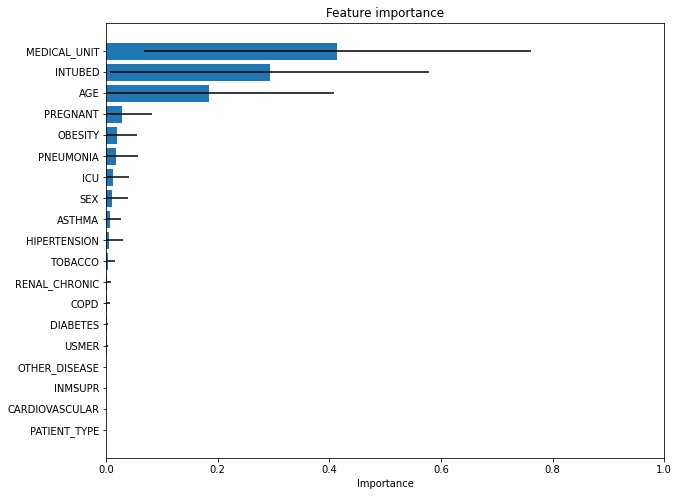

In [ ]:
# Compare feature importance in the models above
# use model.feature_importances_ to determine the importance of each feature
# also create a plot with the variance of the feature importance in each of the estimators

# Model 1 --> prediction_model
# done with the train data set, larger, more interesting with the variance
fistd = np.std([tree.feature_importances_ for tree in prediction_model.estimators_],
             axis=0)

print("Random Forest feature importance")
for f, fi, s in zip (train_features.columns, prediction_model.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

indices = np.argsort(prediction_model.feature_importances_)
plt.figure(figsize= (10,8))
plt.title("Feature importance")
plt.barh(np.arange(prediction_model.feature_importances_.shape[0]), 
        prediction_model.feature_importances_[indices],
       xerr=fistd[indices], align="center")
plt.yticks(range(prediction_model.feature_importances_.shape[0]), 
          labels=train_features.columns[indices])
plt.xlim(0, 1)
plt.xlabel('Importance')
plt.show()  

The initial machine learning was done (with these features: "MEDICAL_UNIT","SEX","AGE","PATIENT_TYPE","INTUBED","PNEUMONIA","DIABETES","CARDIOVASCULAR", "TOBACCO","OBESITY", "RENAL_CHRONIC", which resulted in an accuracy of 0.70. Most likley by adding more parameters the accruacy of the model could be further increased. 



This was done, and in this version the other parameters can be seen. By increasing the parameters the model becomes more and more accurate.
This can be seen in this version of the code, here the accuarcy has risen to 0.82 with the testing data set. This is because some parameters that were initially excluded have a high feature importance 


The main variable that influence the outcome, death, are medical unit, intubated, and age. Followed by pregnancy, obesity and pneumonia 
The accuracy between the testing and train is very similar (0.837 vs 0.836), which is good. This also indicated that most likley there isn't any overfitting.

Grid-search CV, to optmise the hyperparameters of the model

In [ ]:
from sklearn.model_selection import GridSearchCV

# determine the classifier and basic parameters of the classifier
grid_cv =  RandomForestClassifier(random_state=2021)

# decide the hyperparameters to be tested
min_samples_split = [2,3,4]                                      
max_depth=[3,4,5,6,8, None]
criterion= ['gini','entropy']
parameters_rf=dict(min_samples_split=min_samples_split,criterion=criterion,max_depth=max_depth)

#training random forest model with combinations of all hyperparameters above using GridSearchCV
# GridSearchCV will find the hyperparameters that will give you the best predictions in cross validation according to the scoring method chosen

gridrf=GridSearchCV(grid_cv,parameters_rf,cv=10, scoring = 'accuracy')
gridrf.fit(train_features,train_labels)
#gridrf.fit(train_df[ml_features],train_df['diagnosis'])

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 8, None],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

In [ ]:
print("Search CV model parameters with random forest classifier")
examinebestmodel(gridrf)

Search CV model parameters with random forest classifier
0.8589422970762112
{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 4}
RandomForestClassifier(max_depth=8, min_samples_split=4, random_state=2021)


In [ ]:
# various results for the model on TRAIN set
train_prediction_cv_train=gridrf.best_estimator_.predict(train_features)
print("Outcomes with model, with parameters from grid search CV, with train set")
print(getresults(train_labels,train_prediction_cv_train))

Outcomes with model, with parameters from grid search CV, with train set
('Precision:', 0.8678142358868364, 'Recall: ', 0.9837091814321277, 'Accuracy:', 0.8629292898782734, 'F1:', 0.9221345229924504)


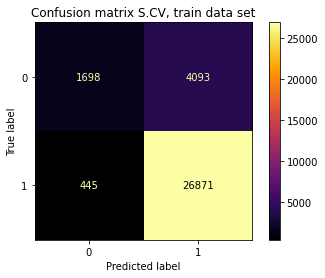

In [ ]:
#confusion matrix for the optimised model with grid search CV with TRAIN data set
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gridrf.best_estimator_,train_features,train_labels,cmap='inferno',values_format='g')
plt.title("Confusion matrix S.CV, train data set")
plt.show()

In [ ]:
# various results for the model on TEST set
test_prediction_cv=gridrf.best_estimator_.predict(test_features)
print("Outcomes with model, with parameters from grid search CV, with test set")
print(getresults(test_labels,test_prediction_cv))

Outcomes with model, with parameters from grid search CV, with test set
('Precision:', 0.8641283339775802, 'Recall: ', 0.9819898967713595, 'Accuracy:', 0.85773831098224, 'F1:', 0.9192968027140948)


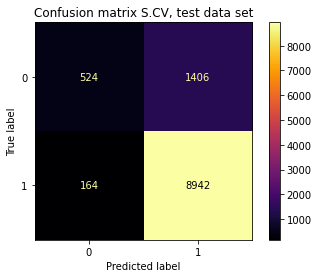

In [ ]:
#confusion matrix for the optimised model with grid search CV with TEST data set
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gridrf.best_estimator_,test_features,test_labels,cmap='inferno',values_format='g')
plt.title("Confusion matrix S.CV, test data set")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report_CV = classification_report(test_labels, test_prediction_cv, output_dict = True)
print("RandomForestClassifier_Grid_search_CV_report, with test data")
print(classification_report(test_labels, test_prediction_cv))

# You can also save this report as a .csv file
report_dataframe_CV = pd.DataFrame.from_dict(report_CV)
report_dataframe_CV.to_csv('RandomForestClassifier_Grid_search_CV_report.csv')
#report_dataframe_CV.to_csv(output_path + 'class-prediction-CV_report.csv') for euler

RandomForestClassifier_Grid_search_CV_report, with test data
              precision    recall  f1-score   support

           0       0.76      0.27      0.40      1930
           1       0.86      0.98      0.92      9106

    accuracy                           0.86     11036
   macro avg       0.81      0.63      0.66     11036
weighted avg       0.85      0.86      0.83     11036



Random Forest feature importance
USMER 0.01 +/- 0.0
MEDICAL_UNIT 0.43 +/- 0.11
SEX 0.01 +/- 0.01
PATIENT_TYPE 0.0 +/- 0.0
INTUBED 0.2 +/- 0.05
PNEUMONIA 0.02 +/- 0.01
AGE 0.2 +/- 0.08
PREGNANT 0.01 +/- 0.01
DIABETES 0.01 +/- 0.0
COPD 0.0 +/- 0.0
ASTHMA 0.01 +/- 0.01
INMSUPR 0.0 +/- 0.0
HIPERTENSION 0.01 +/- 0.01
OTHER_DISEASE 0.01 +/- 0.0
CARDIOVASCULAR 0.0 +/- 0.0
OBESITY 0.02 +/- 0.01
RENAL_CHRONIC 0.01 +/- 0.0
TOBACCO 0.01 +/- 0.01
ICU 0.02 +/- 0.01


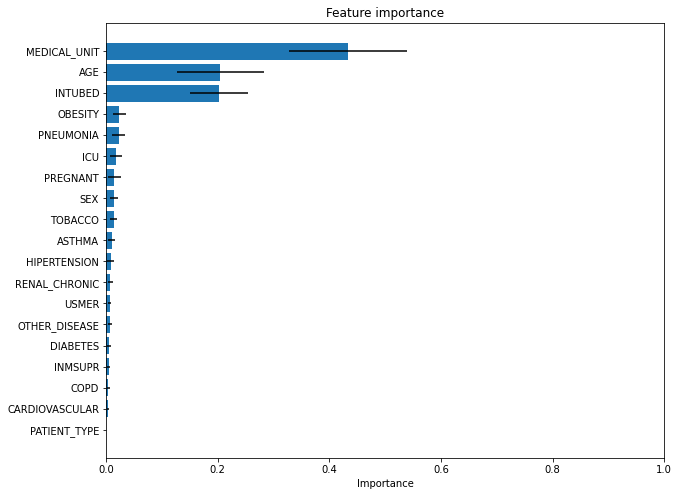

In [ ]:
fistd = np.std([tree.feature_importances_ for tree in gridrf.best_estimator_],
             axis=0)

print("Random Forest feature importance")
for f, fi, s in zip (test_features.columns, gridrf.best_estimator_.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

indices = np.argsort(gridrf.best_estimator_.feature_importances_)
plt.figure(figsize= (10,8))
plt.title("Feature importance")
plt.barh(np.arange(gridrf.best_estimator_.feature_importances_.shape[0]), 
        gridrf.best_estimator_.feature_importances_[indices],
       xerr=fistd[indices], align="center")
plt.yticks(range(gridrf.best_estimator_.feature_importances_.shape[0]), 
          labels=test_features.columns[indices])
plt.xlim(0, 1)
plt.xlabel('Importance')
plt.show()  

By optimising the parameters there is a slight change in accuracy in the test data set, from 0.83 to 0.85. Which is slighlty better, this indicates that the initial hyperparameters were already pretty good. The feature importance of the first three features remains similar, however in the cv search model the importance of an ICU, Pneumonia, Obesity and sex increases and pregnancy decreases.

One ways of increasing the accuarcy could be to have more variable such as genetics. 


K-NN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
neighbors=[3,5,9,13]
metric=['manhattan','euclidean', 'chebyshev']
algorithm=['ball_tree', 'brute','auto', 'kd_tree']
parameters_knn=dict(n_neighbors=neighbors,metric=metric,algorithm=algorithm)

#training KNN model, finding best params
gridknn=GridSearchCV(knn,parameters_knn,cv=10,verbose=1, scoring = 'accuracy')
gridknn.fit(train_features,train_labels)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'auto', 'kd_tree'],
                         'metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'n_neighbors': [3, 5, 9, 13]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Search CV parameters with KNN model")
examinebestmodel(gridknn)

Search CV parameters with KNN model
0.8462260012172187
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 13}
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=13)


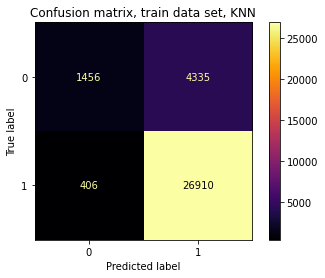

In [ ]:
# confusion matrix with the TRAIN features 
ConfusionMatrixDisplay.from_estimator(gridknn.best_estimator_,train_features,train_labels,cmap='inferno',values_format='g')
plt.title("Confusion matrix, train data set, KNN")
plt.show()

In [ ]:
# calculate the predicted survival rate, with the TRAIN features 
predicted_survival_knn_train = gridknn.predict(train_features)
#function to print results with TRAIN set and prediction variable
print("Outcomes with KNN Grid search CV model, on train set")
print(getresults(train_labels,predicted_survival_knn_train)) #need to have the labels here 

Outcomes with KNN Grid search CV model, on train set
('Precision:', 0.8612578012481997, 'Recall: ', 0.9851369160931323, 'Accuracy:', 0.856797656084816, 'F1:', 0.919041683031369)


In [ ]:
#predicting on test set, after finding the optimal parameters from the CV optimisation 
test_prediction_knn=gridknn.best_estimator_.predict(test_features)
print("Outcomes with KNN Grid search CV model, on test set")
print(getresults(test_labels,test_prediction_knn))

Outcomes with KNN Grid search CV model, on test set
('Precision:', 0.8554758488761358, 'Recall: ', 0.9822095321765869, 'Accuracy:', 0.8484052192823487, 'F1:', 0.9144726752211032)


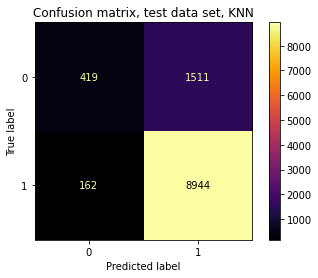

In [ ]:
#confusion matrix for KNN on TEST set
ConfusionMatrixDisplay.from_estimator(gridknn.best_estimator_,test_features,test_labels,cmap='inferno',values_format='g')
plt.title("Confusion matrix, test data set, KNN")
plt.show()

In [ ]:
report_CV = classification_report(test_labels, test_prediction_knn, output_dict = True)
print("Outcomes with KNN Grid search CV model, on test set")
print(classification_report(test_labels, test_prediction_knn))

# You can also save this report as a .csv file
report_dataframe_CV = pd.DataFrame.from_dict(report_CV)
report_dataframe_CV.to_csv('class-prediction_Grid_search_cv_KNN_report.csv')

Outcomes with KNN Grid search CV model, on test set
              precision    recall  f1-score   support

           0       0.72      0.22      0.33      1930
           1       0.86      0.98      0.91      9106

    accuracy                           0.85     11036
   macro avg       0.79      0.60      0.62     11036
weighted avg       0.83      0.85      0.81     11036



With the KNN model the accuracy is slightly worse than with the random forest classifier (0.84 vs 0.85 with the same test data set).
Here the hyperparameters are already optimised as the model was created with seach CV. As mentioned above, this is real world data were it isn't always so eays to predict with higher accuracy scores. 
It would be interesting to add more predictors for the death outcome, such as genetic factors (might have stronger correlations).